In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### 1.)  A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [2]:
drive_through = stats.poisson(2)

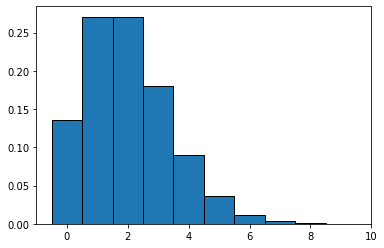

In [3]:
x = np.arange(0, 10)
y = stats.poisson(2).pmf(x)

plt.bar(x, y, ec='black', width=1)
plt.show()

- What is the probability that no cars drive up in the noon hour?

In [4]:
no_cars = np.random.normal(2, size=100_000)
probability_no_cars = no_cars < 1

In [5]:
# simulated probability
(probability_no_cars).mean()

0.15728

In [6]:
# theoretical probability
drive_through.pmf(0)

0.1353352832366127

- What is the probability that 3 or more cars come through the drive through?

In [7]:
three_cars = np.random.normal(2, size=100_000)
probability_three_cars = three_cars >= 3

In [8]:
#simulated probability
(probability_three_cars).mean()

0.15729

In [9]:
#theoretical probability
drive_through.sf(2)

0.32332358381693654

- How likely is it that the drive through gets at least 1 car?

In [10]:
one_car = np.random.normal(2, size=100_000)
at_least_one_car = one_car >= 1

In [11]:
#simulated probability
(at_least_one_car).mean()

0.84134

In [12]:
#theoretical probability
drive_through.sf(0)

0.8646647167633873

### 2.) Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [13]:
state_university = stats.norm(3.0, .3)

- What grade point average is required to be in the top 5% of the graduating class?

In [14]:
# theoretical probability
state_university.isf(.05)

3.4934560880854417

In [15]:
university_grades = np.random.normal(3.0, .3, size=100_000)
university_grades

array([3.40354845, 3.00330303, 2.99866086, ..., 3.33943923, 3.32843003,
       2.55704563])

In [16]:
# simulated probability
top_5 = np.percentile(university_grades, 95, axis=0)
top_5

3.493521504942941

- What GPA constitutes the bottom 15% of the class?

In [17]:
# theoretical probability
state_university.ppf(.15)

2.689069983151863

In [18]:
bottom_15 = np.random.normal(3.0, .3, size=100_000)
bottom_15

array([2.79683105, 2.9444954 , 2.97720795, ..., 2.9197609 , 2.93051838,
       3.42735637])

In [19]:
#simulated probability
percentil_15 = np.percentile(bottom_15, 15, axis=0)
percentil_15

2.6906784086191378

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [20]:
#theoretical probability
decile = state_university.ppf(.30)
decile

2.842679846187588

In [21]:
third_decile = np.random.normal(3.0, .3, size=100_000)
third_decile

array([3.02832205, 3.12238422, 2.58564401, ..., 3.38337653, 2.72777418,
       3.65764353])

In [22]:
#simulated probability
decile_third = np.percentile(third_decile, 30, axis=0)
decile_third

2.8433061453478112

- If I have a GPA of 3.5, what percentile am I in?

In [79]:
# theoretical probability
state_university.cdf(3.5)

0.9522096477271853

In [24]:
three_point_5 = np.random.normal(3.0, .3, size=100_000)

In [80]:
#simulated probability
(three_point_5 <= 3.5).mean()

0.95229

### 3.) A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [97]:
# theoretical probability
clicks = stats.binom(4326, .02)
clicks.sf(96)

0.1397582363130086

In [96]:
# simulated probability
sim_clicks = stats.binom(4326, .02).rvs(100_000)
(sim_clicks > 96).mean()

0.13947

### 4.) You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct

In [87]:
# theoretical probability
n = 60
p = 0.01

stats_homework = stats.binom(n, p).sf(0)
stats_homework

0.4528433576092388

In [91]:
homework = (stats.binom(n, p).rvs(100_000) > 0)
homework.mean()

0.45246

### 5.) The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [31]:
# this might be our answer but i'm not sure lol
n = (22 * 3) * .9
p = .03

clean_chance = stats.binom(n, p).pmf([1, 2, 5])
clean_chance

array([0.30086868, 0.27171233, 0.02402744])

In [32]:
# 1 day
n = (22 * 3) * .9
p = .03
cleanup = stats.binom(n, p).pmf(1)
cleanup

0.3008686801329963

In [33]:
# 2 days
n = ((22 * 3) * .9) * 2
p = .03

two_days = stats.binom(n, p).pmf(2)
two_days

0.179519986604209

In [34]:
# 5 days 

n = ((22 * 3) * .9) * 5
p = 0.03

all_week = stats.binom(n, p).pmf(5)
all_week

0.06206640063166543

### 6.) You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [35]:
#theoretical
mean = 15 * 2
std = 3 * 2
wait_time = 60 - (15 + 2 + 10)
lunch_line = stats.norm(mean, std).cdf(wait_time)
lunch_line

0.6914624612740131

In [36]:
# simulating
sim_lunch = np.random.normal(mean, std, size=100_000)
(sim_lunch <= wait_time).mean()

0.69206

### 7.) Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

In [62]:
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = 'SELECT * FROM salaries WHERE to_date > NOW()'

salaries = pd.read_sql(query, url)
salaries.describe()



,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


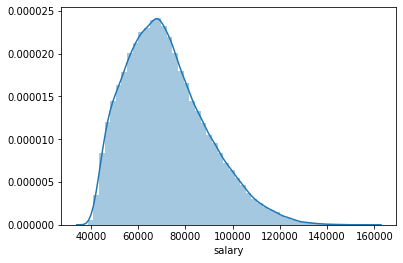

In [59]:
sns.distplot(salaries.salary)

- What percent of employees earn less than 60,000?

In [64]:
salaries.salary.mean()

72012.23585730705

In [69]:
less_than_60 = stats.norm(salaries.salary.mean(), salaries.salary.std()).cdf(60000)
less_than_60

0.24385742480214423

- What percent of employees earn more than 95,000?

In [71]:
more_than_95 = stats.norm(salaries.salary.mean(), salaries.salary.std()).sf(95000)
more_than_95

0.09208819199804053

- What percent of employees earn between 65,000 and 80,000?

- What do the top 5% of employees make?

In [78]:
top_5_employees = stats.norm(salaries.salary.mean(), salaries.salary.std())
top_5_employees.isf(.05)

100484.64454102777